### Case Churn - Neon

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from tqdm.notebook import tqdm
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

**Importando os dados**

In [2]:
##IMPORTANDO ARQUIVOS
df= pd.read_csv('dataset_churn.csv')
df.head(10) #visualizando as 10 primeiras linhas do dataset

,Score Crédito,Estado,Gênero,Idade,Tempo como cliente (meses),Saldo,Número de produtos,Possui Cartao de Crédito,Assina mensalidade,Renda Mensal Presumida (R$),Churn_2_meses
0,619,São Paulo,Feminino,42,2,0.00,1,1,1,4222.870000,1
1,608,Rio de Janeiro,Feminino,41,1,83807.86,1,0,1,4689.274167,0
2,502,São Paulo,Feminino,42,8,159660.80,3,1,0,4747.148750,1
3,699,São Paulo,Feminino,39,1,0.00,2,0,0,3909.442917,0
4,850,Rio de Janeiro,Feminino,43,2,125510.82,1,1,1,3295.170833,0
5,645,Rio de Janeiro,Masculino,44,8,113755.78,2,1,0,6239.862917,1
6,822,São Paulo,Masculino,50,7,0.00,2,1,1,419.283333,0
7,376,Minas Gerais,Feminino,29,4,115046.74,4,1,0,4972.786667,1
8,501,São Paulo,Masculino,44,4,142051.07,2,0,1,3122.520833,0
9,684,São Paulo,Masculino,27,2,134603.88,1,1,1,2988.572083,0


## **1.Análise Exploratória dos dados**

*Identificando as variáveis presentes no dataset*

In [3]:
pd.DataFrame.info(df);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Score Crédito                10000 non-null  int64  
 1   Estado                       10000 non-null  object 
 2   Gênero                       10000 non-null  object 
 3   Idade                        10000 non-null  int64  
 4   Tempo como cliente (meses)   10000 non-null  int64  
 5   Saldo                        10000 non-null  float64
 6   Número de produtos           10000 non-null  int64  
 7   Possui Cartao de Crédito     10000 non-null  int64  
 8   Assina mensalidade           10000 non-null  int64  
 9   Renda Mensal Presumida (R$)  10000 non-null  float64
 10  Churn_2_meses                10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


Observamos que temos 10 variáveis e 10000 observações no dataset

* **Variáveis categóricas:** Gênero, Estado, Possui Cartao de Crédito, Assina mensalidade e Churn_2_meses.
* **Variáveis numéricas:** Score Crédito, idade, Tempo como cliente (meses), Saldo, Número de produtos, Renda Mensal Presumida (R$).

**Identificando a variável alvo**: Churn_2_meses


In [4]:
df.describe()

,Score Crédito,Idade,Tempo como cliente (meses),Saldo,Número de produtos,Possui Cartao de Crédito,Assina mensalidade,Renda Mensal Presumida (R$),Churn_2_meses
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,4170.426662,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,2396.270534,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.482500,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,2125.087917,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,4174.746458,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,6224.510312,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,8333.020000,1.000000


Os clientes, dessa agência bancária, têm em média 39 anos, sendo a idade mínima de 18 anos e máxima de 92 anos. 
A pontuação de crédito fica em torno de 650 pontos e o índice médio de tempo com o cliente é de 5 meses. 

70% dos clientes possuem cartão de crédito e apenas 51% fzem assinatura mensal.

Analisando a variável de Churn, observa-se que 20% dos clientes romperam seu contrato


#### Distribuição das variáveis

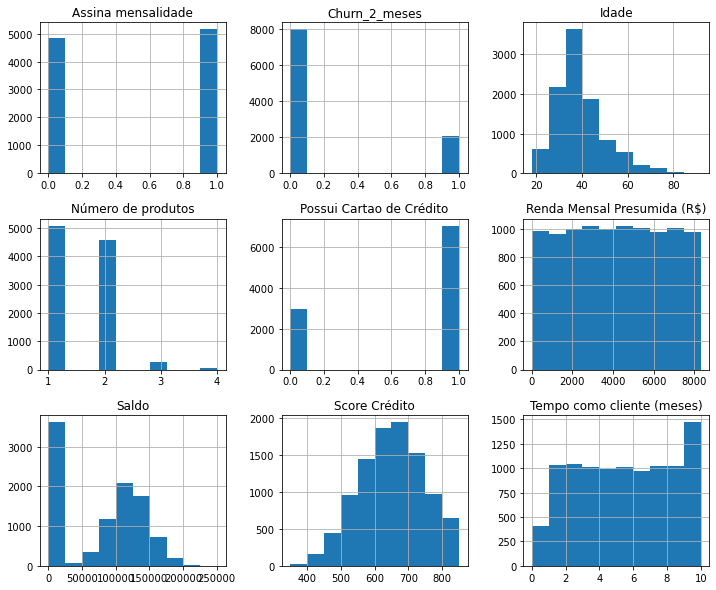

In [5]:
df.hist(figsize=(12,10));

A maioria dos clientes têm entre 30 a 45 anos e poucos clientes têm idade superior a 60 anos.

In [6]:
df_EDA = df.copy()

In [7]:
df_EDA['Churn_2_meses_categ']=df_EDA['Churn_2_meses'].replace([0,1],['Não','Sim'])
x_cont=['Score Crédito','Saldo','Idade','Renda Mensal Presumida (R$)','Tempo como cliente (meses)', 'Número de produtos']

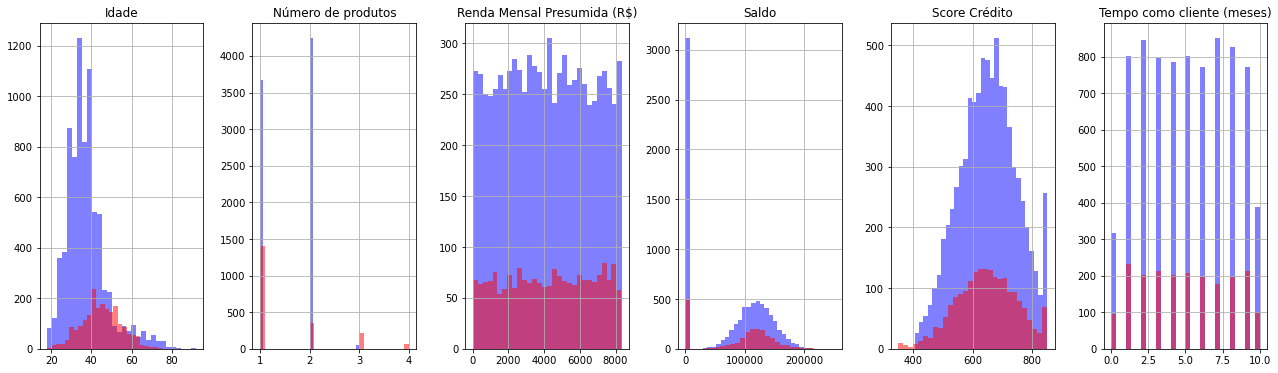

In [8]:
fig, ax = plt.subplots(1, 6, figsize=(22, 6));
df_EDA[df_EDA['Churn_2_meses_categ'] == "Não"][x_cont].hist( bins=30, color="blue", alpha=0.5, ax=ax);
df_EDA[df_EDA['Churn_2_meses_categ'] == "Sim"][x_cont].hist( bins=30, color="red", alpha=0.5, ax=ax);

Observar-se que o churn é maior em pessoas com mais de 45 anos e quanto maior o número de produtos bancários, maior a taxa de churn

In [9]:
cols= ['#FF6347', '#B0E0E6','#D8BFD8']

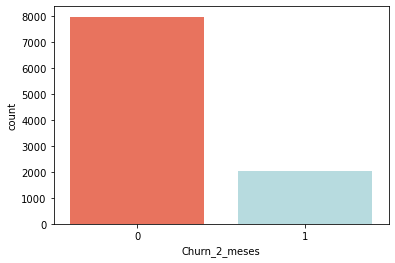

In [10]:
sns.countplot(data=df_EDA,x='Churn_2_meses',palette=cols);

20% dos clientes deram churn. Existindo um desbalanceamento na variável target

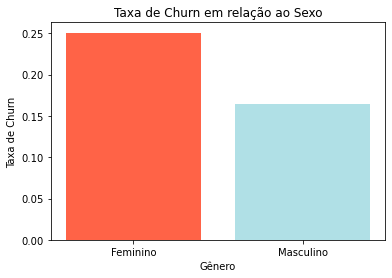

In [11]:
df_plot = df_EDA.groupby (['Gênero'])['Churn_2_meses'].mean (). reset_index () 
x =df_plot['Gênero']
y=df_plot['Churn_2_meses']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação ao Sexo');
plt.xlabel('Gênero');
plt.ylabel('Taxa de Churn');

Observa-se que as mulheres têm um risco maior de Churn do que os homens.

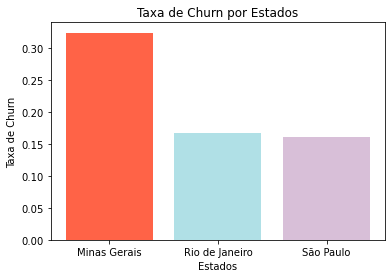

In [12]:
df_plot = df_EDA.groupby (['Estado'])['Churn_2_meses'].mean (). reset_index () 
x = df_plot['Estado']
y = df_plot['Churn_2_meses']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn por Estados');
plt.xlabel('Estados');
plt.ylabel('Taxa de Churn');

Observa-se que a porcentagem de Churn em Minas gerais é bastante elevada, onde 32% dos clientes deram churn.

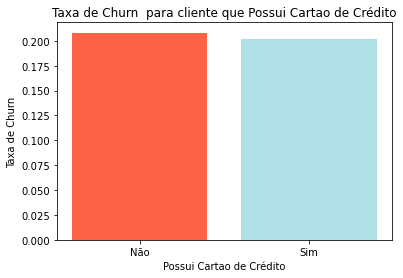

In [13]:
df_EDA['Possui Cartao de Crédito']=df['Possui Cartao de Crédito'].replace([0,1],['Não','Sim'])
df_plot = df_EDA.groupby (['Possui Cartao de Crédito'])['Churn_2_meses'].mean (). reset_index ()
x =df_plot['Possui Cartao de Crédito']
y=df_plot['Churn_2_meses']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn  para cliente que Possui Cartao de Crédito');
plt.xlabel('Possui Cartao de Crédito');
plt.ylabel('Taxa de Churn');

Observe que o cliente ter ou não cartão de crédito parece não influenciar no Churn.

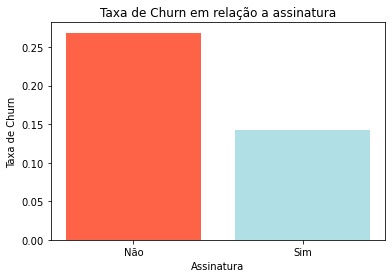

In [14]:
df_EDA['Assina mensalidade']=df_EDA['Assina mensalidade'].replace([0,1],['Não','Sim'])
df_plot = df_EDA.groupby (['Assina mensalidade'])['Churn_2_meses'].mean (). reset_index ()
x =df_plot['Assina mensalidade']
y=df_plot['Churn_2_meses']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação a assinatura');
plt.xlabel('Assinatura');
plt.ylabel('Taxa de Churn');

In [15]:
df.columns

Index(['Score Crédito', 'Estado', 'Gênero', 'Idade',
       'Tempo como cliente (meses)', 'Saldo', 'Número de produtos',
       'Possui Cartao de Crédito', 'Assina mensalidade',
       'Renda Mensal Presumida (R$)', 'Churn_2_meses'],
      dtype='object')

In [16]:
df_cont=df_EDA[['Idade','Saldo','Tempo como cliente (meses)','Número de produtos','Renda Mensal Presumida (R$)']]

* **Matriz de Correlação**

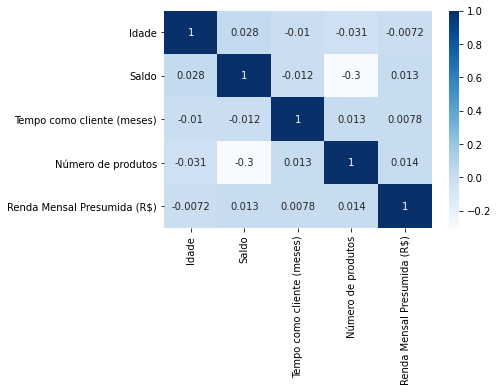

In [17]:
sns.heatmap(df_cont.corr(),annot = True,
            cmap='Blues');

Analisando a correlação entre as variáveis, observa-se que temos baixas correlações.

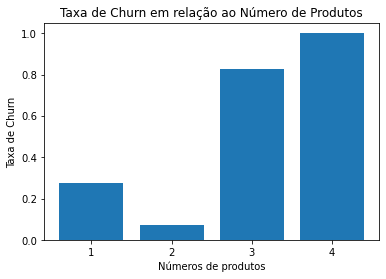

In [18]:
df_plot = df_EDA.groupby(['Número de produtos'])['Churn_2_meses'].mean().reset_index ()
x = df_plot['Número de produtos']
y = df_plot['Churn_2_meses']
plt.bar(x,y);
plt.title('Taxa de Churn em relação ao Número de Produtos');
plt.xlabel('Números de produtos');
plt.ylabel('Taxa de Churn');
plt.xticks(x, (1,2,3,4));

Quanto maior o número de produtos maior a taxa de Churn.

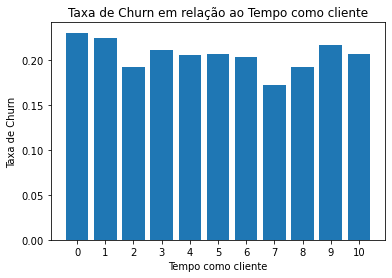

In [19]:
df_plot = df_EDA.groupby(['Tempo como cliente (meses)'])['Churn_2_meses'].mean().reset_index ()
#Número de produtos em relação a variável churn
x =df_plot['Tempo como cliente (meses)']
y=df_plot['Churn_2_meses']
plt.bar(x,y);
plt.title('Taxa de Churn em relação ao Tempo como cliente');
plt.xlabel('Tempo como cliente');
plt.ylabel('Taxa de Churn');
plt.xticks(x, (0,1,2,3,4,5,6,7,8,9,10));

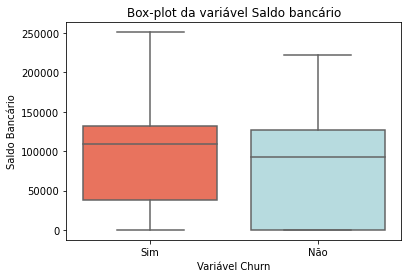

In [20]:
sns.boxplot(x='Churn_2_meses_categ', y='Saldo', data=df_EDA,palette=cols);
plt.title('Box-plot da variável Saldo bancário');
plt.xlabel('Variável Churn');
plt.ylabel('Saldo Bancário');

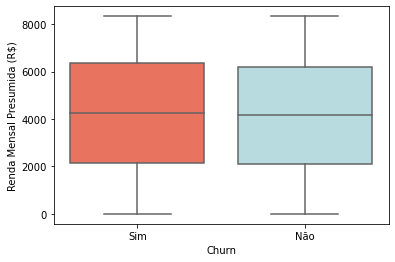

In [21]:
sns.boxplot(x='Churn_2_meses_categ', y='Renda Mensal Presumida (R$)' , data=df_EDA,palette=cols);
plt.xlabel('Churn');
plt.ylabel('Renda Mensal Presumida (R$)');

O salário estimado parece não influenciar no cancelamento ou não do serviço bancário.

Text(0, 0.5, 'Taxa de Churn')

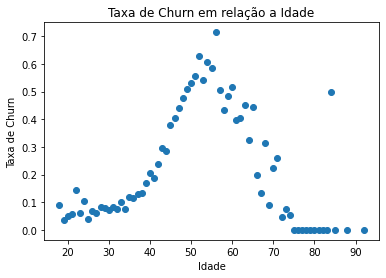

In [22]:
df_plot = df_EDA.groupby(['Idade'])['Churn_2_meses'].mean().reset_index ()
x = df_plot['Idade']
y = df_plot['Churn_2_meses']
plt.scatter(x,y);
plt.title('Taxa de Churn em relação a Idade')
plt.xlabel('Idade')
plt.ylabel('Taxa de Churn')

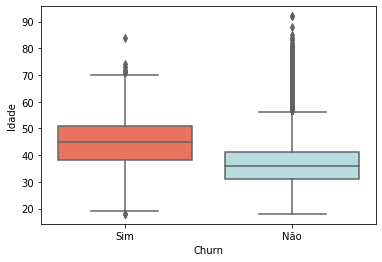

In [23]:
sns.boxplot(x='Churn_2_meses_categ', y='Idade' , data=df_EDA,palette=cols);
plt.xlabel('Churn');
plt.ylabel('Idade');

Observa-se, pelo boxplot, que clientes que cancelaram o serviço têm uma idade maior do que os clientes que não cancelaram o serviço. Pelo gráfico de dispersão,observa-se que pessoas entre 45 e 65 anos tem uma alta taxa de Churn

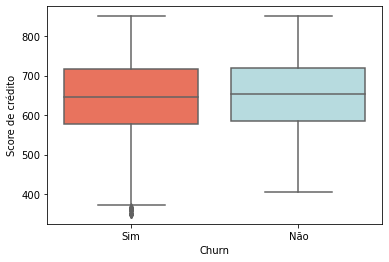

In [24]:
sns.boxplot(x='Churn_2_meses_categ', y='Score Crédito' , data=df_EDA,palette=cols);
plt.xlabel('Churn');
plt.ylabel('Score de crédito');

Text(0, 0.5, 'Taxa de Churn')

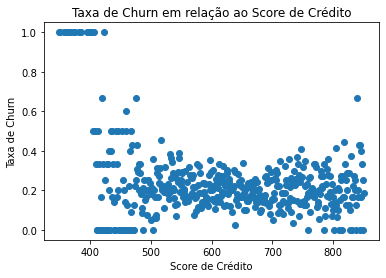

In [25]:
df_plot = df.groupby (['Score Crédito'])['Churn_2_meses'].mean (). reset_index () 
x =df_plot['Score Crédito']
y=df_plot['Churn_2_meses']
plt.scatter(x,y)
plt.title('Taxa de Churn em relação ao Score de Crédito')
plt.xlabel('Score de Crédito')
plt.ylabel('Taxa de Churn')

A taxa de Churn é maior entre os clientes com baixo escore de crédito. 

### Conclusão análise exploratória

Observa-se que clientes de Minas Gerais, do sexo feminino, com alto número de produtos, score de crédito baixo, com saldo bancário elevado e com idade entre 45 e 65 anos têm uma taxa de Churn maior que os outros clientes.

## **2.Tratamentos dos dados.**

In [26]:
df.isnull().sum()

Score Crédito                  0
Estado                         0
Gênero                         0
Idade                          0
Tempo como cliente (meses)     0
Saldo                          0
Número de produtos             0
Possui Cartao de Crédito       0
Assina mensalidade             0
Renda Mensal Presumida (R$)    0
Churn_2_meses                  0
dtype: int64

In [27]:
#Separando o dataset
y = df['Churn_2_meses']
X = df.drop('Churn_2_meses',axis = 1)

In [28]:
#Separando variáveis categoricas
x_continua = ['Score Crédito','Saldo','Idade','Renda Mensal Presumida (R$)','Tempo como cliente (meses)']
x_categ = list(set(X)-set(x_continua))
x_dummies=X[x_categ]
x_dummies

,Assina mensalidade,Estado,Possui Cartao de Crédito,Número de produtos,Gênero
0,1,São Paulo,1,1,Feminino
1,1,Rio de Janeiro,0,1,Feminino
2,0,São Paulo,1,3,Feminino
3,0,São Paulo,0,2,Feminino
4,1,Rio de Janeiro,1,1,Feminino
...,...,...,...,...,...
9995,0,São Paulo,1,2,Masculino
9996,1,São Paulo,1,1,Masculino
9997,1,São Paulo,0,1,Feminino
9998,0,Minas Gerais,1,2,Masculino


In [29]:
##Substituindo a variável gênero para 0 e 1 Feminino = 0 Masculino = 1 
le = LabelEncoder()
X['Gênero'] = le.fit_transform(X['Gênero']) 
X.head(10)

,Score Crédito,Estado,Gênero,Idade,Tempo como cliente (meses),Saldo,Número de produtos,Possui Cartao de Crédito,Assina mensalidade,Renda Mensal Presumida (R$)
0,619,São Paulo,0,42,2,0.00,1,1,1,4222.870000
1,608,Rio de Janeiro,0,41,1,83807.86,1,0,1,4689.274167
2,502,São Paulo,0,42,8,159660.80,3,1,0,4747.148750
3,699,São Paulo,0,39,1,0.00,2,0,0,3909.442917
4,850,Rio de Janeiro,0,43,2,125510.82,1,1,1,3295.170833
5,645,Rio de Janeiro,1,44,8,113755.78,2,1,0,6239.862917
6,822,São Paulo,1,50,7,0.00,2,1,1,419.283333
7,376,Minas Gerais,0,29,4,115046.74,4,1,0,4972.786667
8,501,São Paulo,1,44,4,142051.07,2,0,1,3122.520833
9,684,São Paulo,1,27,2,134603.88,1,1,1,2988.572083


In [30]:
X = pd.get_dummies (data = X, columns=['Estado','Número de produtos'])

In [31]:
scaler = MinMaxScaler()
X[x_continua] = scaler.fit_transform(X[x_continua])
X[x_continua]

,Score Crédito,Saldo,Idade,Renda Mensal Presumida (R$),Tempo como cliente (meses)
0,0.538,0.000000,0.324324,0.506735,0.2
1,0.516,0.334031,0.310811,0.562709,0.1
2,0.304,0.636357,0.324324,0.569654,0.8
3,0.698,0.000000,0.283784,0.469120,0.1
4,1.000,0.500246,0.337838,0.395400,0.2
...,...,...,...,...,...
9995,0.842,0.000000,0.283784,0.481341,0.5
9996,0.332,0.228657,0.229730,0.508490,1.0
9997,0.718,0.000000,0.243243,0.210390,0.7
9998,0.844,0.299226,0.324324,0.464429,0.3


**Fazendo oversampling**

In [32]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)
y_resampled.value_counts(normalize=True)
X1 = X_resampled.copy()

In [33]:
x_treino, x_teste, y_treino,y_teste  = train_test_split(X,y, test_size = 0.25, random_state = 42)
x_treino_res, x_teste_res, y_treino_res,y_teste_res= train_test_split(X_resampled,y_resampled, test_size = 0.25, random_state = 42)

## 3. Testando Modelos

In [34]:
lr = LogisticRegression(solver='newton-cg')
bg = BaggingClassifier(base_estimator=lr)
rf = RandomForestClassifier(class_weight='balanced')
knn = KNeighborsClassifier()
xgb = XGBClassifier()

In [35]:
clf_list = [lr,bg,rf,knn,xgb]

**Sem oversampling**

=> LogisticRegression


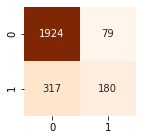

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2003
           1       0.69      0.36      0.48       497

    accuracy                           0.84      2500
   macro avg       0.78      0.66      0.69      2500
weighted avg       0.83      0.84      0.82      2500

=> BaggingClassifier


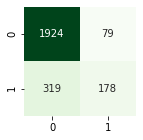

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2003
           1       0.69      0.36      0.47       497

    accuracy                           0.84      2500
   macro avg       0.78      0.66      0.69      2500
weighted avg       0.82      0.84      0.82      2500

=> RandomForestClassifier


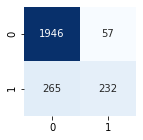

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2003
           1       0.80      0.47      0.59       497

    accuracy                           0.87      2500
   macro avg       0.84      0.72      0.76      2500
weighted avg       0.86      0.87      0.86      2500

=> KNeighborsClassifier


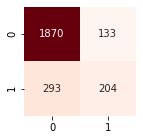

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      2003
           1       0.61      0.41      0.49       497

    accuracy                           0.83      2500
   macro avg       0.73      0.67      0.69      2500
weighted avg       0.81      0.83      0.82      2500

=> XGBClassifier


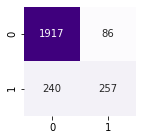

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      2003
           1       0.75      0.52      0.61       497

    accuracy                           0.87      2500
   macro avg       0.82      0.74      0.77      2500
weighted avg       0.86      0.87      0.86      2500



In [36]:
cmap_lst = ['Oranges', 'Greens', 'Blues','Reds', 'Purples']
for clf, cmap in zip(clf_list, cmap_lst):
    print('=>', clf.__class__.__name__)
    clf.fit(x_treino, y_treino)
    y_pred = clf.predict(x_teste)
    
    plt.figure(figsize=(2, 2))
    sns.heatmap(confusion_matrix(y_teste, y_pred),
                annot=True, cbar=False, fmt='g', cmap=cmap)
    plt.show()
    print(classification_report(y_teste, y_pred))
    print('='*60)

**Com oversampling**

LogisticRegression(solver='newton-cg')
=> LogisticRegression


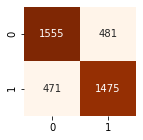

              precision    recall  f1-score   support

           0       0.77      0.76      0.77      2036
           1       0.75      0.76      0.76      1946

    accuracy                           0.76      3982
   macro avg       0.76      0.76      0.76      3982
weighted avg       0.76      0.76      0.76      3982

BaggingClassifier(base_estimator=LogisticRegression(solver='newton-cg'))
=> BaggingClassifier


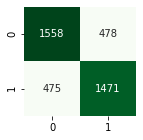

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      2036
           1       0.75      0.76      0.76      1946

    accuracy                           0.76      3982
   macro avg       0.76      0.76      0.76      3982
weighted avg       0.76      0.76      0.76      3982

RandomForestClassifier(class_weight='balanced')
=> RandomForestClassifier


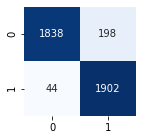

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      2036
           1       0.91      0.98      0.94      1946

    accuracy                           0.94      3982
   macro avg       0.94      0.94      0.94      3982
weighted avg       0.94      0.94      0.94      3982

KNeighborsClassifier()
=> KNeighborsClassifier


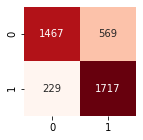

              precision    recall  f1-score   support

           0       0.86      0.72      0.79      2036
           1       0.75      0.88      0.81      1946

    accuracy                           0.80      3982
   macro avg       0.81      0.80      0.80      3982
weighted avg       0.81      0.80      0.80      3982

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
=> XGBClassifier


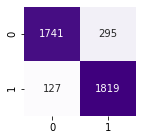

              precision    recall  f1-score   support

           0       0.93      0.86      0.89      2036
           1       0.86      0.93      0.90      1946

    accuracy                           0.89      3982
   macro avg       0.90      0.89      0.89      3982
weighted avg       0.90      0.89      0.89      3982



In [37]:
cmap_lst = ['Oranges', 'Greens', 'Blues','Reds', 'Purples']
for clf, cmap in zip(clf_list, cmap_lst):
    print(clf)
    print('=>', clf.__class__.__name__)
    clf.fit(x_treino_res, y_treino_res)
    y_pred = clf.predict(x_teste_res)
    
    plt.figure(figsize=(2, 2))
    sns.heatmap(confusion_matrix(y_teste_res, y_pred),
                annot=True, cbar=False, fmt='g', cmap=cmap)
    
    plt.show()
    print(classification_report(y_teste_res, y_pred))
    print('='*60)

Podemos ver que o oversampling foi capaz de melhorar a acurácia, usaremos para outras comparações os modelos com oversampling a partir de agora. 

### Comparação de custo total para a escolha do algoritmo 

Segundo o relátorio do BB sobre Equity Research do Banco inter https://www.bb.com.br/docs/portal/dimec/BIDIRP19.pdf
o CAC (custo de aquisição de clientes) médio é de **R$ 21,14** reais por cliente no ano de 2019

Vamos supor também que é cinco vezes mais caro adquirir um novo cliente do que manter um existente. Então custo para manter (CM) igual **R$ 4,23** reais por cliente

* Custo:
    * Falso negativo (previsão de que não ocorre churn, mas ocorre):R$ 21,14

    * Verdadeiro positivo (previsão de que ocorre churn e, de fato, ocorre): R$ 4,23

    * Falso positivo (previsão de que ocorre churn, mas não ocorre): R$ 4,23

    * Verdadeiro negativo (previsão de que não ocorre churn e, de fato, não ocorre):R$ 0

In [38]:
CAC = 21.14
CM = 4.23

In [39]:
def calcula_custo(clf_list):
    cs_total = []
    clfs_list = []
    for clf in clf_list: 
        clfs_list.append(clf.__class__.__name__)
        clf.fit(x_treino_res, y_treino_res)
        y_pred = clf.predict(x_teste_res)

        cm = confusion_matrix(y_teste_res, y_pred)
        TP = cm[0][0]
        TN = cm[1][1]
        FP = cm[0][1]
        FN = cm[1][0]
        cs_tl = (FN*CAC + TP*CM + FP*CM + TN * 0)/len(y_teste_res)
        cs_total.append(cs_tl)
    return (cs_total, clfs_list)

In [40]:
cs_p_ct, clfs_list = calcula_custo(clf_list)
df_ct = pd.DataFrame({'Modelo': clfs_list,
                      'Custo por cliente': cs_p_ct})
df_ct.sort_values('Custo por cliente',ascending=True )

,Modelo,Custo por cliente
2,RandomForestClassifier,2.396394
4,XGBClassifier,2.837032
3,KNeighborsClassifier,3.378538
1,BaggingClassifier,4.657981
0,LogisticRegression,4.663290


**Pelos valores de accuracy, recall e menor custo total escolheu-se o modelo com RandomForest para ajustar seus hiper-parâmetros** 

### **Analisando a importância das variáveis**

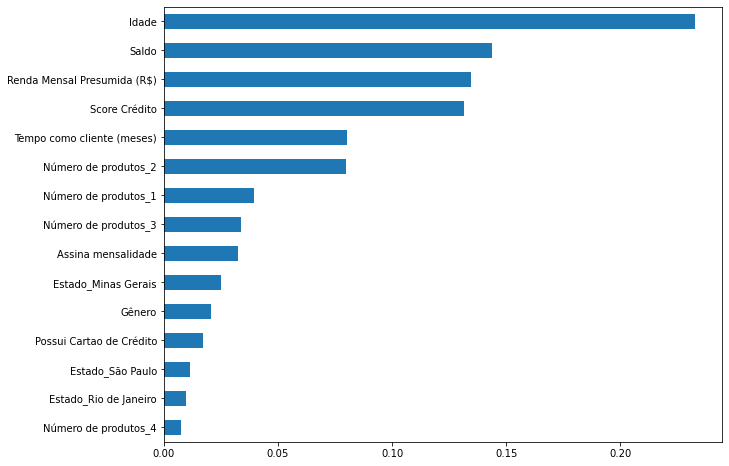

In [41]:
fig = plt.subplots(figsize=(10,8))
pd.Series(rf.feature_importances_, index=x_treino_res.columns).sort_values().plot(kind='barh');

**Tunando Hiper-Parâmetro**

In [42]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV , StratifiedKFold

In [43]:
skf = StratifiedKFold(5)

In [44]:
n_estimators = [30,40,50,60]
## Min Samples Split
min_samples_split = [2, 4, 6, 10]
## Min Samples Leaf
min_samples_leaf = [1, 2, 4, 6, 8]
## Max Features
max_features = ['auto', 'sqrt','log2', None]
# Criando o Random Search
class_weight = ['balanced', 'balanced_subsample']

rf_parametros = {
                'n_estimators': n_estimators,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features': max_features}
## Random Forest Tuning
RFtuning = RandomizedSearchCV(estimator=rf, ## Random Forest
                              param_distributions=rf_parametros, ## Parâmetros
                              cv=skf, ## Cross validation
                              n_iter=20, ## Número de Iterações
                              scoring = 'neg_mean_absolute_error', ## Métrica
                              n_jobs = -1, ## Utilizando todos os processadores
                              verbose = 1)

RFtuning.fit(x_treino_res, y_treino_res)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.0min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 4, 6, 10],
                                        'n_estimators': [30, 40, 50, 60]},
                   scoring='neg_mean_absolute_error', verbose=1)

In [45]:
RFtuning.best_estimator_

RandomForestClassifier(class_weight='balanced', min_samples_split=4,
                       n_estimators=40)

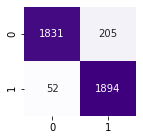

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      2036
           1       0.90      0.97      0.94      1946

    accuracy                           0.94      3982
   macro avg       0.94      0.94      0.94      3982
weighted avg       0.94      0.94      0.94      3982



In [46]:
rf2 = RandomForestClassifier(class_weight='balanced', max_features='sqrt',
                    n_estimators=60)
rf2.fit(x_treino_res, y_treino_res)
y_pred = rf2.predict(x_teste_res)
    
plt.figure(figsize=(2, 2))
sns.heatmap(confusion_matrix(y_teste_res, y_pred),
            annot=True, cbar=False, fmt='g', cmap=cmap)
    
plt.show()
print(classification_report(y_teste_res, y_pred))

Tunar o Hiper-parâmetro não produziu diferença

### Conclusão Final 

* O algoritmo escolhido que possibilitou um menor custo por cliente de R$ 2,40 reais por cliente, foi o RandomForestClassifier com uma acurácia de 94%